In [3]:
#basic imports
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv('/kaggle/input/nasa-nearest-earth-objects-1910-2024/nearest-earth-objects(1910-2024).csv')

In [5]:
df.head()

,neo_id,name,absolute_magnitude,estimated_diameter_min,estimated_diameter_max,orbiting_body,relative_velocity,miss_distance,is_hazardous
0,2162117,162117 (1998 SD15),19.14,0.394962,0.883161,Earth,71745.401048,5.814362e+07,False
1,2349507,349507 (2008 QY),18.50,0.530341,1.185878,Earth,109949.757148,5.580105e+07,True
2,2455415,455415 (2003 GA),21.45,0.136319,0.304818,Earth,24865.506798,6.720689e+07,False
3,3132126,(2002 PB),20.63,0.198863,0.444672,Earth,78890.076805,3.039644e+07,False
4,3557844,(2011 DW),22.70,0.076658,0.171412,Earth,56036.519484,6.311863e+07,False


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 338199 entries, 0 to 338198
Data columns (total 9 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   neo_id                  338199 non-null  int64  
 1   name                    338199 non-null  object 
 2   absolute_magnitude      338171 non-null  float64
 3   estimated_diameter_min  338171 non-null  float64
 4   estimated_diameter_max  338171 non-null  float64
 5   orbiting_body           338199 non-null  object 
 6   relative_velocity       338199 non-null  float64
 7   miss_distance           338199 non-null  float64
 8   is_hazardous            338199 non-null  bool   
dtypes: bool(1), float64(5), int64(1), object(2)
memory usage: 21.0+ MB


In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
neo_id,338199.0,1.759939e+07,2.287225e+07,2.000433e+06,3.373980e+06,3.742127e+06,5.405374e+07,5.446281e+07
absolute_magnitude,338171.0,2.293252e+01,2.911216e+00,9.250000e+00,2.074000e+01,2.280000e+01,2.510000e+01,3.358000e+01
estimated_diameter_min,338171.0,1.578120e-01,3.138851e-01,5.111578e-04,2.538370e-02,7.320740e-02,1.890406e-01,3.754525e+01
estimated_diameter_max,338171.0,3.528785e-01,7.018685e-01,1.142983e-03,5.675969e-02,1.636967e-01,4.227075e-01,8.395373e+01
relative_velocity,338199.0,5.106066e+04,2.639924e+04,2.033464e+02,3.071203e+04,4.756047e+04,6.667382e+04,2.917811e+05
miss_distance,338199.0,4.153535e+07,2.077399e+07,6.745533e+03,2.494540e+07,4.332674e+07,5.933961e+07,7.479865e+07


In [8]:
df.drop_duplicates(inplace=True)

In [9]:
df.dropna(inplace=True)

In [10]:
# droppping oribiting body column as it has only single value
df.drop('orbiting_body',axis=1,inplace=True)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 338171 entries, 0 to 338198
Data columns (total 8 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   neo_id                  338171 non-null  int64  
 1   name                    338171 non-null  object 
 2   absolute_magnitude      338171 non-null  float64
 3   estimated_diameter_min  338171 non-null  float64
 4   estimated_diameter_max  338171 non-null  float64
 5   relative_velocity       338171 non-null  float64
 6   miss_distance           338171 non-null  float64
 7   is_hazardous            338171 non-null  bool   
dtypes: bool(1), float64(5), int64(1), object(1)
memory usage: 21.0+ MB


In [12]:
#extracting year from name
df['name'].tail(30)

338169      175921 (2000 DM1)
338170    185851 (2000 DP107)
338171           (2013 TE135)
338172             (2014 GK1)
338173             (2015 XQ1)
338174            (2016 TQ18)
338175             (2018 EO4)
338176             (2018 PY7)
338177             (2019 NG2)
338178              (2019 QZ)
338179             (2020 JB1)
338180             (2021 LD2)
338181             (2021 UW2)
338182             (2022 YU3)
338183             (2024 KQ1)
338184              (2024 ND)
338185             (2024 NL2)
338186             (2024 NQ2)
338187     337345 (2001 KO20)
338188     482055 (2010 AH30)
338189             (2017 YZ1)
338190             (2020 HH5)
338191      585310 (2017 YZ1)
338192             (2022 GQ2)
338193             (2022 YJ2)
338194             (2023 VS4)
338195             (2023 XW5)
338196             (2024 KJ7)
338197              (2024 NE)
338198             (2024 NH3)
Name: name, dtype: object

In [13]:
import re
pattern = r'\((\d{4})'

In [14]:
text = df['name'].loc[338197]
text

'(2024 NE)'

In [15]:
re.findall(pattern,text)[0]

'2024'

In [16]:
def find_year(text):
    match = re.search(pattern,text)
    if match:
        return match.group(1)
    else:
        return -9999

In [17]:
df['year'] = df['name'].apply(find_year)
df['year'] = df['year'].apply(lambda x : int(x))

In [18]:
len(df['year'])

338171

In [19]:
len(df)

338171

In [20]:
df.head()

,neo_id,name,absolute_magnitude,estimated_diameter_min,estimated_diameter_max,relative_velocity,miss_distance,is_hazardous,year
0,2162117,162117 (1998 SD15),19.14,0.394962,0.883161,71745.401048,5.814362e+07,False,1998
1,2349507,349507 (2008 QY),18.50,0.530341,1.185878,109949.757148,5.580105e+07,True,2008
2,2455415,455415 (2003 GA),21.45,0.136319,0.304818,24865.506798,6.720689e+07,False,2003
3,3132126,(2002 PB),20.63,0.198863,0.444672,78890.076805,3.039644e+07,False,2002
4,3557844,(2011 DW),22.70,0.076658,0.171412,56036.519484,6.311863e+07,False,2011


In [21]:
#dropping neo_id,name columns
df.select_dtypes(include='number').corr()

,neo_id,absolute_magnitude,estimated_diameter_min,estimated_diameter_max,relative_velocity,miss_distance,year
neo_id,1.000000,0.350145,-0.198471,-0.198471,-0.103069,-0.090746,0.047052
absolute_magnitude,0.350145,1.000000,-0.594646,-0.594646,-0.345570,-0.213523,0.060509
estimated_diameter_min,-0.198471,-0.594646,1.000000,1.000000,0.222434,0.111475,-0.433033
estimated_diameter_max,-0.198471,-0.594646,1.000000,1.000000,0.222434,0.111475,-0.433033
relative_velocity,-0.103069,-0.345570,0.222434,0.222434,1.000000,0.322589,-0.001228
miss_distance,-0.090746,-0.213523,0.111475,0.111475,0.322589,1.000000,-0.007894
year,0.047052,0.060509,-0.433033,-0.433033,-0.001228,-0.007894,1.000000


In [22]:
df = df.drop(['neo_id','name'],axis=1)

<Axes: xlabel='is_hazardous', ylabel='count'>

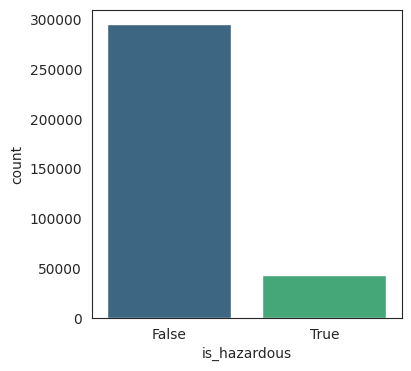

In [23]:
%matplotlib inline
sns.set_style('white')
plt.figure(figsize=(4,4))
sns.countplot(x='is_hazardous',data =df, palette='viridis')

In [24]:
df['is_hazardous'].value_counts()

is_hazardous
False    295009
True      43162
Name: count, dtype: int64

In [57]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_box(df):
    column_list = list(df.select_dtypes(include='number').columns)
    num_plots = len(column_list)
    nrows = (num_plots + 1) // 2
    ncols = 2
    fig, axes = plt.subplots(ncols=ncols, nrows=nrows, figsize=(20, 20), facecolor='black')
    
    for i, column in enumerate(column_list):
        row = i // 2
        col = i % 2
        ax = axes[row, col]
        ax.set_facecolor('black')
        
        sns.boxplot(x='is_hazardous', y=column, data=df, ax=ax, palette='rocket', linewidth=2.5, saturation=0.9)
        
        ax.set_title(f'Boxplot of {column}', color='white', fontsize=14, weight='bold')
        ax.set_xlabel(f'{column}', color='white', fontsize=12)
        ax.set_ylabel('Values', color='white', fontsize=12)
        
        ax.tick_params(axis='x', colors='white', labelsize=10)
        ax.tick_params(axis='y', colors='white', labelsize=10)
        
        for spine in ax.spines.values():
            spine.set_edgecolor('white')
        
        # Handle legend if present
        legend = ax.get_legend()
        if legend is not None:
            legend.get_frame().set_facecolor('black')
            legend.get_frame().set_edgecolor('white')
            plt.setp(legend.get_texts(), color='white')
    
    plt.tight_layout()
    plt.show()

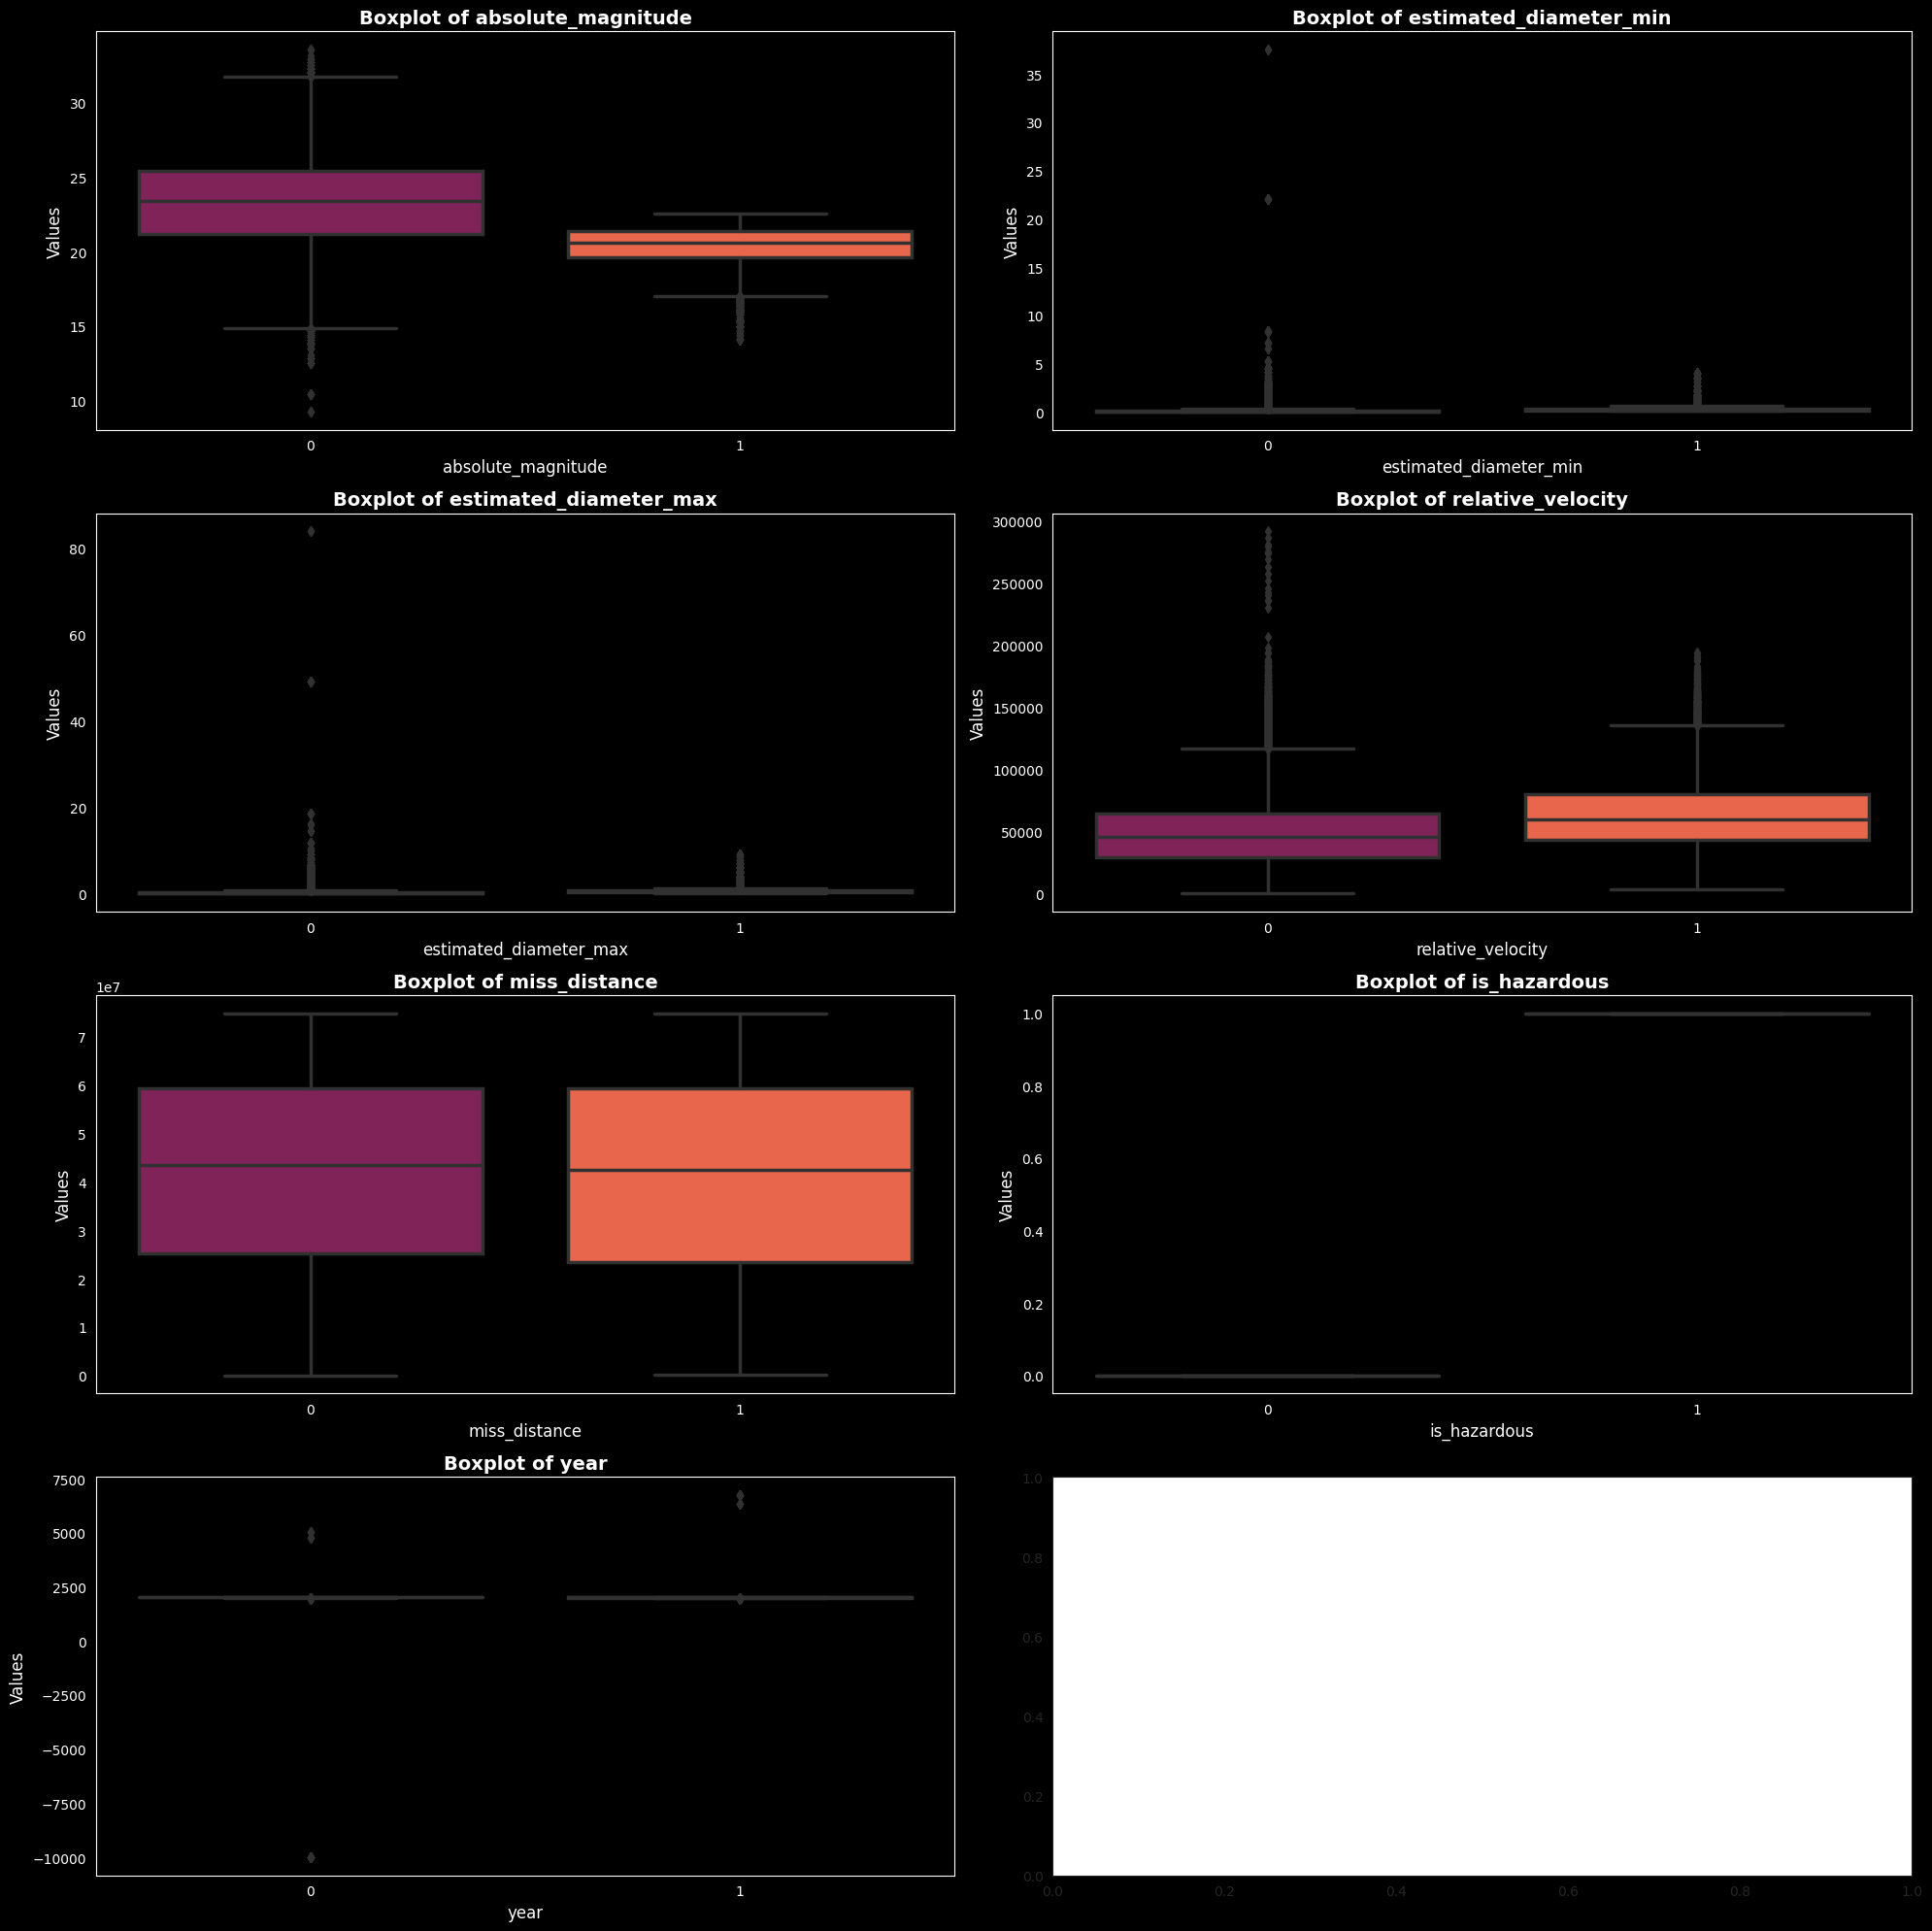

In [58]:
plot_box(df)

In [59]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_hist(df):
    # Get list of numerical columns
    column_list = list(df.select_dtypes(include='number').columns)
    num_plots = len(column_list)
    
    # Determine the layout of the subplots
    nrows = (num_plots + 1) // 2
    ncols = 2
    
    # Create figure and axes with a dark background
    fig, axes = plt.subplots(ncols=ncols, nrows=nrows, figsize=(20, 20), facecolor='black')
    
    for i, column in enumerate(column_list):
        # Determine the row and column index for the current subplot
        row = i // 2
        col = i % 2
        ax = axes[row, col]
        
        # Set the background color of the axes
        ax.set_facecolor('black')
        
        # Create the histogram plot with KDE using Seaborn
        sns.histplot(x=column, data=df, ax=ax, palette='viridis', linewidth=0.9, hue='is_hazardous', bins=70, kde=True)
        
        # Customize title, labels, and tick labels color
        ax.set_title(f'Histplot of {column}', color='white')
        ax.set_xlabel(f'{column}', color='white')
        ax.set_ylabel('Frequency', color='white')
        ax.tick_params(axis='x', colors='white')
        ax.tick_params(axis='y', colors='white')
        
        # Customize the legend
        legend = ax.get_legend()
        if legend is not None:
            legend.get_frame().set_facecolor('black')
            legend.get_frame().set_edgecolor('white')
            plt.setp(legend.get_texts(), color='white')
    
    # Adjust layout to prevent overlap
    plt.tight_layout()
    
    # Show the plot
    plt.show()


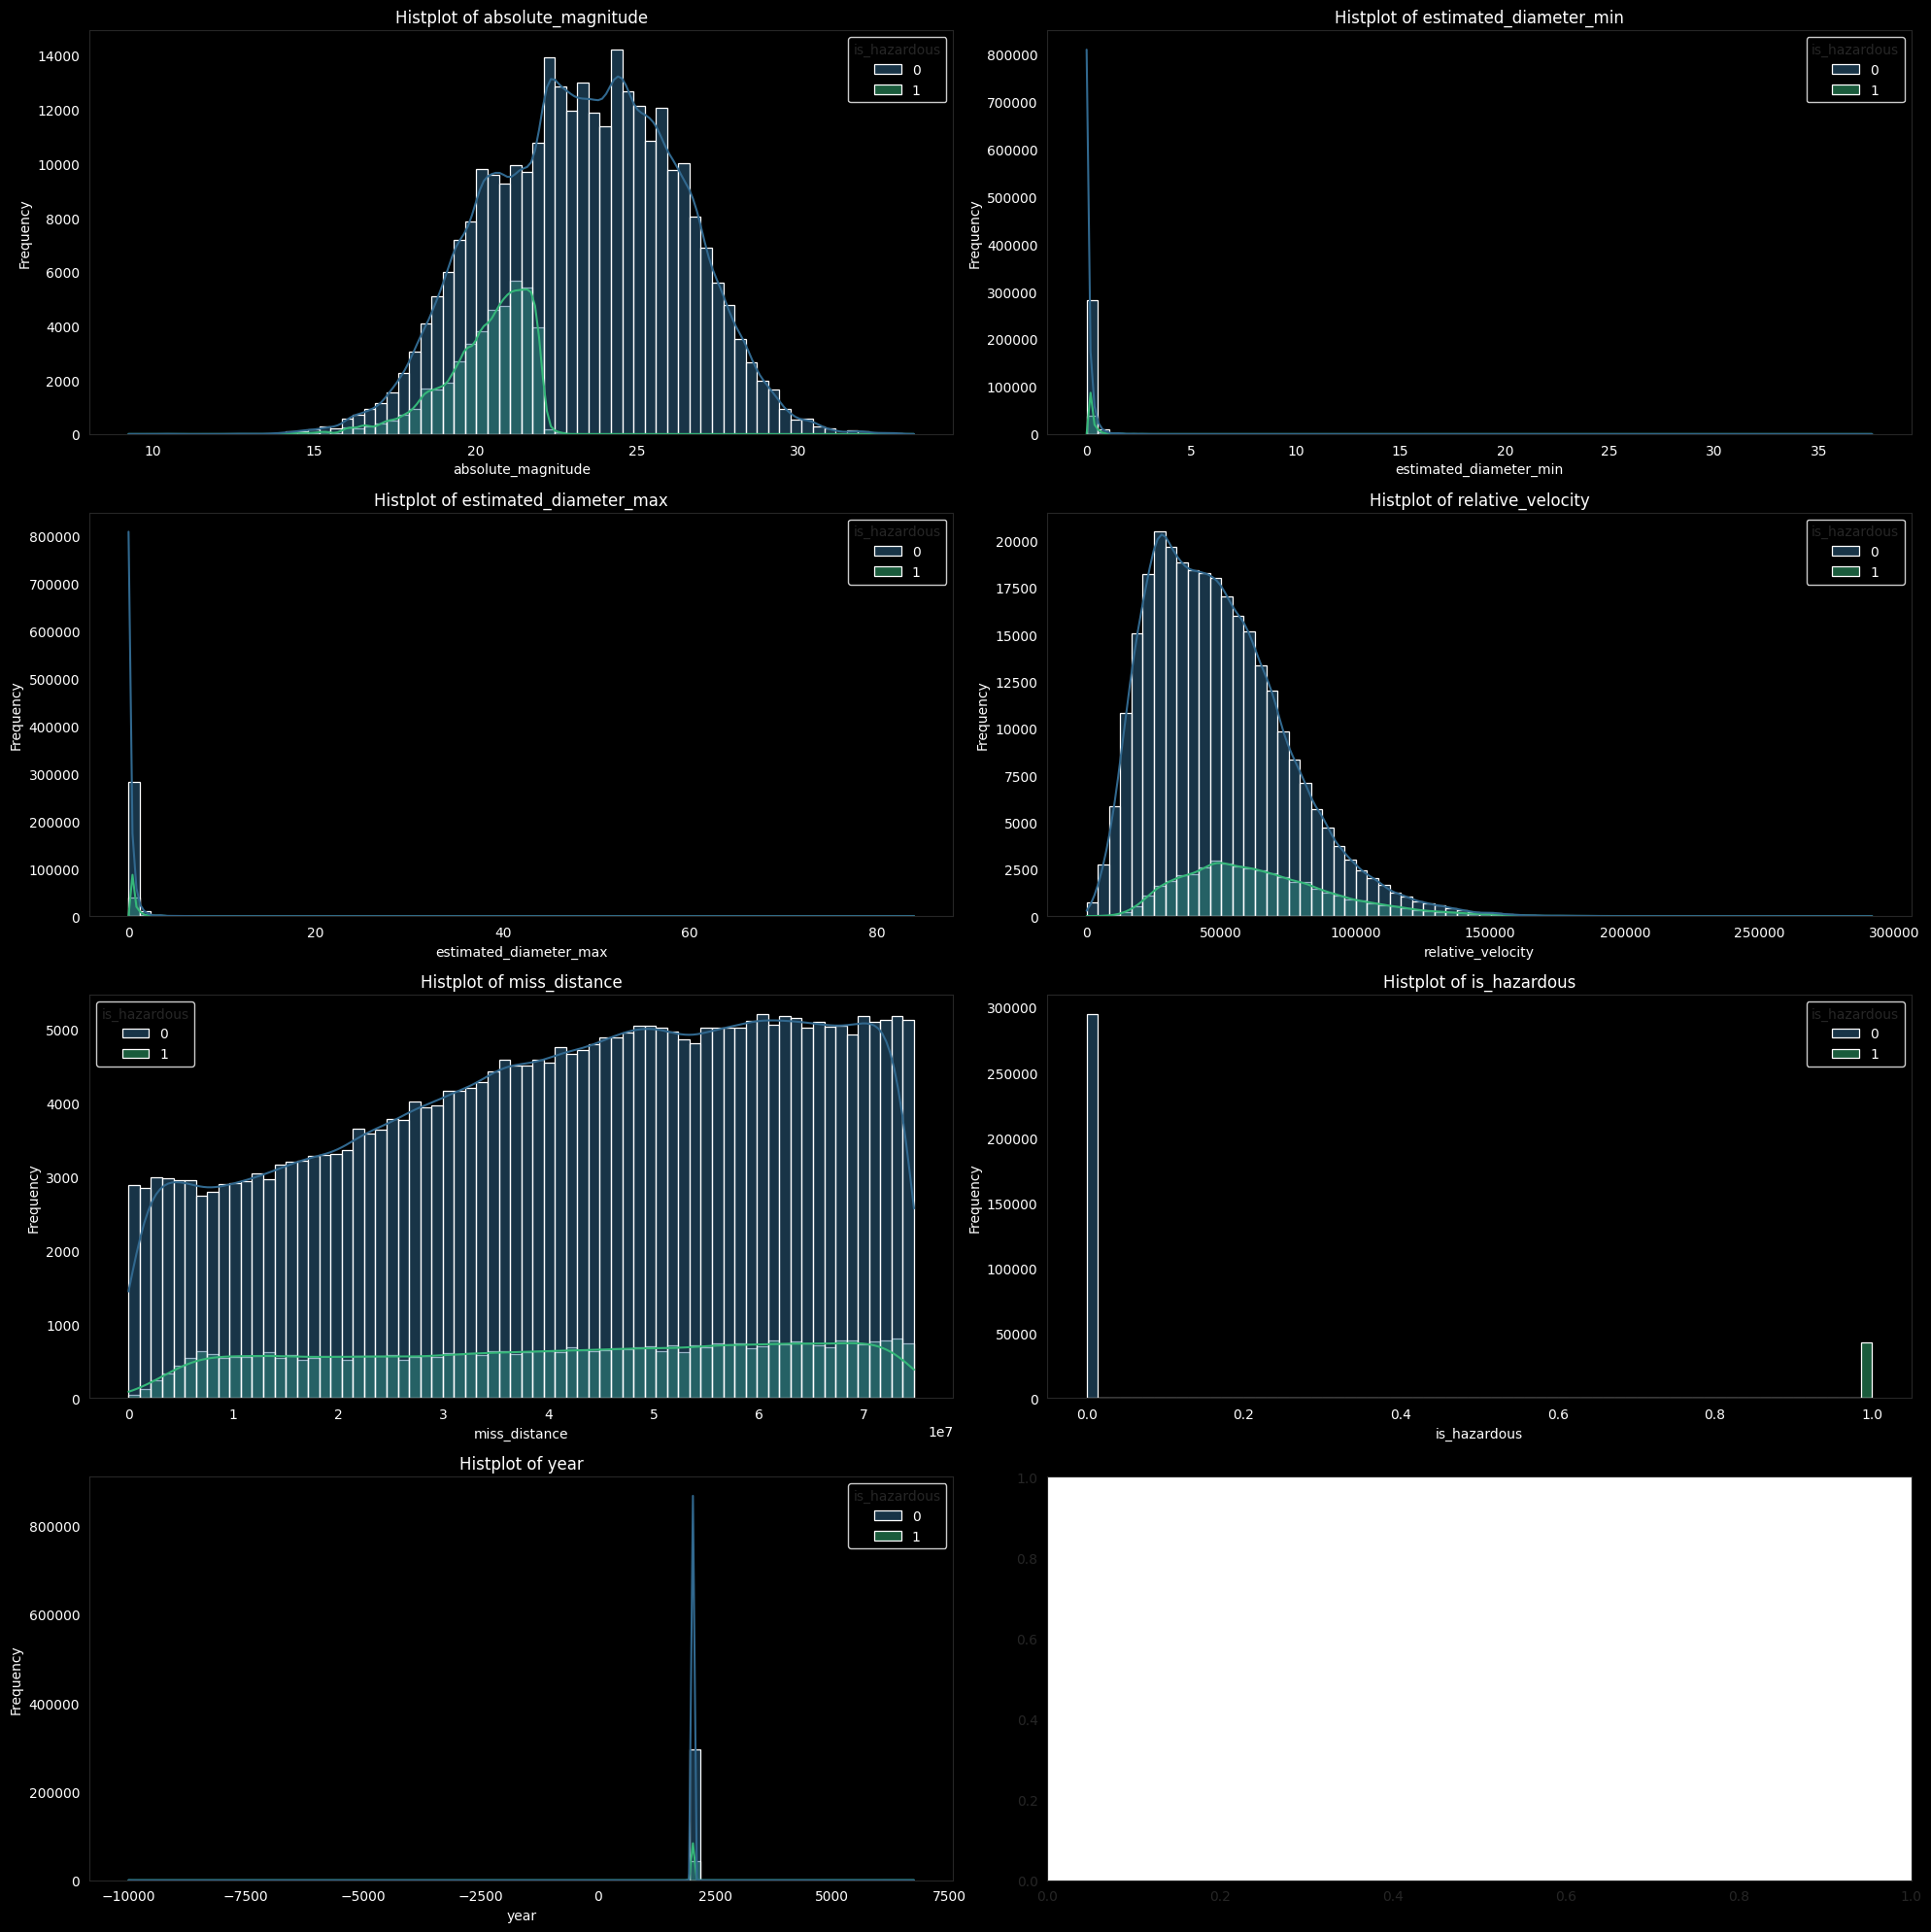

In [61]:
plot_hist(df)

<Axes: >

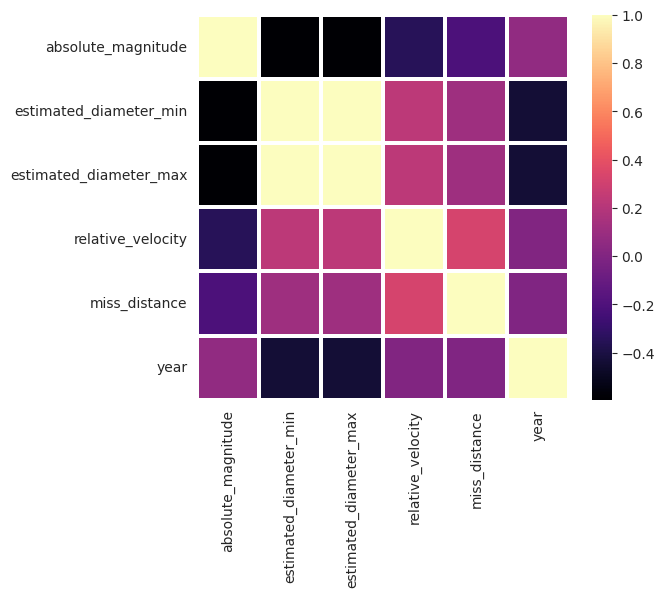

In [29]:
plt.figure(figsize=(6,5))
sns.heatmap(df.select_dtypes(include='number').corr(),cmap="magma",linecolor='white',linewidths=1.5)

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 338171 entries, 0 to 338198
Data columns (total 7 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   absolute_magnitude      338171 non-null  float64
 1   estimated_diameter_min  338171 non-null  float64
 2   estimated_diameter_max  338171 non-null  float64
 3   relative_velocity       338171 non-null  float64
 4   miss_distance           338171 non-null  float64
 5   is_hazardous            338171 non-null  bool   
 6   year                    338171 non-null  int64  
dtypes: bool(1), float64(5), int64(1)
memory usage: 26.4 MB


In [31]:
df['absolute_magnitude'] = df['absolute_magnitude'].astype('float32')
df['estimated_diameter_min'] = df['estimated_diameter_min'].astype('float32')
df['estimated_diameter_max'] = df['estimated_diameter_max'].astype('float32')
df['miss_distance'] = df['miss_distance'].astype('float32')
df['year'] = df['year'].astype('int16')

In [32]:
from sklearn.preprocessing import LabelEncoder
lbl_en = LabelEncoder()
df['is_hazardous'] = lbl_en.fit_transform(df['is_hazardous'])

In [33]:
#splitting into train and test
X = df.drop('is_hazardous',axis=1)
y = df['is_hazardous']
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,stratify=y)
X_train,X_val,y_train,y_val = train_test_split(X_train,y_train,test_size=0.2,stratify=y_train)

In [34]:
#scaling
from sklearn.preprocessing import StandardScaler
st_sclr = StandardScaler()
X_train = st_sclr.fit_transform(X_train)
X_test = st_sclr.transform(X_test)
X_val = st_sclr.transform(X_val)

In [35]:
df['is_hazardous'].value_counts()

is_hazardous
0    295009
1     43162
Name: count, dtype: int64

In [36]:
#imabalance exist in the class, to solve this we use SMOTE, ADASYN
from imblearn.over_sampling import ADASYN,SMOTE,SVMSMOTE,RandomOverSampler
from collections import Counter
counter = Counter(y_train)
print("Before",counter)
ada = ADASYN()
X_train_ada,y_train_ada = ada.fit_resample(X_train,y_train)
counter = Counter(y_train_ada)
print("After",counter)
X_train_ada,X_val_ada,y_train_ada,y_val_ada = train_test_split(X_train_ada,y_train_ada,test_size=0.2,stratify=y_train_ada)

Before Counter({0: 165205, 1: 24170})
After Counter({0: 165205, 1: 160098})


In [37]:
smote = SMOTE()
print("Before:", Counter(y_train))
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)
print("After:", Counter(y_train_smote))
X_train_smote,X_val_smote,y_train_smote,y_val_smote = train_test_split(X_train_smote,y_train_smote,test_size=0.2,stratify=y_train_smote)

Before: Counter({0: 165205, 1: 24170})
After: Counter({1: 165205, 0: 165205})


In [38]:
rand = RandomOverSampler()
print("Before:", Counter(y_train))
X_train_rand, y_train_rand = rand.fit_resample(X_train, y_train)
print("After:", Counter(y_train_rand))
X_train_rand,X_val_rand,y_train_rand,y_val_rand = train_test_split(X_train_rand,y_train_rand,test_size=0.2,stratify=y_train_rand)

Before: Counter({0: 165205, 1: 24170})
After: Counter({1: 165205, 0: 165205})


In [39]:
svm = SVMSMOTE()
print("Before:", Counter(y_train))
X_train_svm, y_train_svm = svm.fit_resample(X_train, y_train)
print("After:", Counter(y_train_svm))
X_train_svm,X_val_svm,y_train_svm,y_val_svm = train_test_split(X_train_svm,y_train_svm,test_size=0.2,stratify=y_train_svm)

Before: Counter({0: 165205, 1: 24170})
After: Counter({1: 165205, 0: 165205})


### Creating Neural Network

In [40]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.callbacks import EarlyStopping

2024-08-16 14:53:42.698422: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-08-16 14:53:42.698529: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-08-16 14:53:42.822769: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [43]:
def Neo_ANN():
    #create model
    model = Sequential()
    #Layer 1 -> 6
    model.add(Dense(6,activation='relu'))
    model.add(Dense(4608,activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(2304,activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(2304,activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(1152,activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(1152,activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(576,activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(576,activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(288,activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(288,activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(144,activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(144,activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(72,activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(36,activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(18,activation='relu'))
    model.add(Dropout(0.1))
    model.add(Dense(6,activation='relu'))
    model.add(Dropout(0.1))
    model.add(Dense(3,activation='relu'))
    model.add(Dense(1,activation='sigmoid'))
    
    #compile
    model.compile(loss='binary_crossentropy',optimizer='adam',metrics = ['accuracy'])
    #return 
    return model

In [46]:
from tensorflow.keras.backend import clear_session
clear_session()
model_Neo = Neo_ANN()

In [47]:
early_stop = EarlyStopping(patience=50,monitor='val_loss',mode='min')

In [50]:
from sklearn.metrics import classification_report

In [52]:
model_Neo.fit(X_train,y_train,
                 validation_data=(X_val,y_val),
                 callbacks=[early_stop],epochs=250,batch_size=256)
prediction_neo = model_Neo.predict(X_test)
prediction_neo = np.argmax(prediction_neo,axis=1)
print(classification_report(y_test,prediction_neo))

              precision    recall  f1-score   support

           0       0.87      1.00      0.93     88503
           1       0.00      0.00      0.00     12949

    accuracy                           0.87    101452
   macro avg       0.44      0.50      0.47    101452
weighted avg       0.76      0.87      0.81    101452



In [53]:
model_Neo_ada = Neo_ANN()
model_Neo_ada.fit(X_train_ada,y_train_ada,
                 validation_data=(X_val_ada,y_val_ada),
                 callbacks=[early_stop],epochs=250,batch_size=256)
prediction_neo_ada = model_Neo_ada.predict(X_test)
prediction_neo_ada = np.argmax(prediction_neo_ada,axis=1)
print(classification_report(y_test,prediction_neo_ada))

Epoch 1/250
   7/1017 ━━━━━━━━━━━━━━━━━━━━ 26s 26ms/step - accuracy: 0.4872 - loss: 0.6931 

W0000 00:00:1723824066.157491     123 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


1017/1017 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.7841 - loss: 0.6005

W0000 00:00:1723824106.785816     120 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1723824107.465109     121 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


1017/1017 ━━━━━━━━━━━━━━━━━━━━ 77s 42ms/step - accuracy: 0.7841 - loss: 0.6005 - val_accuracy: 0.8294 - val_loss: 0.4874
Epoch 2/250
   9/1017 ━━━━━━━━━━━━━━━━━━━━ 15s 15ms/step - accuracy: 0.8229 - loss: 0.4937

W0000 00:00:1723824109.224332     122 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


1017/1017 ━━━━━━━━━━━━━━━━━━━━ 16s 16ms/step - accuracy: 0.8230 - loss: 0.4796 - val_accuracy: 0.8329 - val_loss: 0.4406
Epoch 3/250
1017/1017 ━━━━━━━━━━━━━━━━━━━━ 16s 16ms/step - accuracy: 0.8266 - loss: 0.4330 - val_accuracy: 0.8314 - val_loss: 0.4054
Epoch 4/250
1017/1017 ━━━━━━━━━━━━━━━━━━━━ 16s 16ms/step - accuracy: 0.8327 - loss: 0.4057 - val_accuracy: 0.8364 - val_loss: 0.3903
Epoch 5/250
1017/1017 ━━━━━━━━━━━━━━━━━━━━ 16s 16ms/step - accuracy: 0.8365 - loss: 0.3901 - val_accuracy: 0.8374 - val_loss: 0.3828
Epoch 6/250
1017/1017 ━━━━━━━━━━━━━━━━━━━━ 16s 16ms/step - accuracy: 0.8351 - loss: 0.3851 - val_accuracy: 0.8386 - val_loss: 0.3730
Epoch 7/250
1017/1017 ━━━━━━━━━━━━━━━━━━━━ 16s 16ms/step - accuracy: 0.8358 - loss: 0.3807 - val_accuracy: 0.8355 - val_loss: 0.3742
Epoch 8/250
1017/1017 ━━━━━━━━━━━━━━━━━━━━ 16s 16ms/step - accuracy: 0.8356 - loss: 0.3777 - val_accuracy: 0.8400 - val_loss: 0.3701
Epoch 9/250
1017/1017 ━━━━━━━━━━━━━━━━━━━━ 16s 16ms/step - accuracy: 0.8379 - los

W0000 00:00:1723824926.201093     120 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


3171/3171 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step
              precision    recall  f1-score   support

           0       0.87      1.00      0.93     88503
           1       0.00      0.00      0.00     12949

    accuracy                           0.87    101452
   macro avg       0.44      0.50      0.47    101452
weighted avg       0.76      0.87      0.81    101452



In [ ]:
model_Neo_smote = Neo_ANN()
model_Neo_smote.fit(X_train_smote,y_train_smote,
                 validation_data=(X_val_smote,y_val_smote),
                epochs=250,batch_size=256)
prediction_neo_smote = model_Neo_smote.predict(X_test)
prediction_neo_smote = np.argmax(prediction_neo_smote,axis=1)
print(classification_report(y_test,prediction_neo_smote))

Epoch 1/250
   6/1033 ━━━━━━━━━━━━━━━━━━━━ 25s 25ms/step - accuracy: 0.5180 - loss: 0.6915 

W0000 00:00:1723829989.055186     122 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


1033/1033 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.7988 - loss: 0.4390

W0000 00:00:1723830031.221695     121 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1723830031.912059     122 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


1033/1033 ━━━━━━━━━━━━━━━━━━━━ 74s 43ms/step - accuracy: 0.7988 - loss: 0.4389 - val_accuracy: 0.8302 - val_loss: 0.3745
Epoch 2/250
   9/1033 ━━━━━━━━━━━━━━━━━━━━ 15s 16ms/step - accuracy: 0.8298 - loss: 0.3811

W0000 00:00:1723830033.344641     120 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


1033/1033 ━━━━━━━━━━━━━━━━━━━━ 17s 16ms/step - accuracy: 0.8331 - loss: 0.3734 - val_accuracy: 0.8228 - val_loss: 0.3774
Epoch 3/250
1033/1033 ━━━━━━━━━━━━━━━━━━━━ 17s 16ms/step - accuracy: 0.8367 - loss: 0.3635 - val_accuracy: 0.8385 - val_loss: 0.3552
Epoch 4/250
1033/1033 ━━━━━━━━━━━━━━━━━━━━ 17s 16ms/step - accuracy: 0.8378 - loss: 0.3606 - val_accuracy: 0.8365 - val_loss: 0.3598
Epoch 5/250
1033/1033 ━━━━━━━━━━━━━━━━━━━━ 17s 16ms/step - accuracy: 0.8392 - loss: 0.3586 - val_accuracy: 0.8389 - val_loss: 0.3548
Epoch 6/250
1033/1033 ━━━━━━━━━━━━━━━━━━━━ 17s 16ms/step - accuracy: 0.8401 - loss: 0.3537 - val_accuracy: 0.8343 - val_loss: 0.3578
Epoch 7/250
1033/1033 ━━━━━━━━━━━━━━━━━━━━ 17s 16ms/step - accuracy: 0.8409 - loss: 0.3510 - val_accuracy: 0.8425 - val_loss: 0.3442
Epoch 8/250
1033/1033 ━━━━━━━━━━━━━━━━━━━━ 17s 16ms/step - accuracy: 0.8402 - loss: 0.3511 - val_accuracy: 0.8410 - val_loss: 0.3468
Epoch 9/250
1033/1033 ━━━━━━━━━━━━━━━━━━━━ 17s 16ms/step - accuracy: 0.8424 - los

In [ ]:
model_Neo_rand = Neo_ANN()
model_Neo_rand.fit(X_train_rand,y_train_rand,
                 validation_data=(X_val_rand,y_val_rand),
                 callbacks=[early_stop],epochs=250,batch_size=512)
prediction_neo_rand = model_Neo_rand.predict(X_test)
prediction_neo_rand = np.argmax(prediction_neo_rand,axis=1)
print(classification_report(y_test,prediction_neo_rand))